# An example of using BluePyOpt/NeuronUnit Optimization
Using:
* Allen Brain Experimental data (`specimen_id=325479788`, sweep number `64`) to derive features from.
* EFEL feature extraction
* BluePyOpt Optimization.
* Numba JIT simple cell models (Adaptive Exponential).
* Neuronunit model scoring

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="paper", font="monospace")
%matplotlib inline
SILENT = True
import warnings
if SILENT:
    warnings.filterwarnings("ignore")

from neuronunit.plotting.plot_utils import check_bin_vm_soma
from neuronunit.allenapi.allen_data_driven import opt_setup
from nb_utils import optimize_job
from sciunit.scores import RelativeDifferenceScore
import pandas as pd
import pickle
import quantities as pq
specimen_id = 325479788


test


In [2]:
def test_opt_relative_diff(specimen_id,model_type = "ADEXP",efel_filter_iterable=None):
    fitnesses,scores,obs_preds,opt,target,hall_of_fame,cell_evaluator = optimize_job(specimen_id,
                                                 model_type,
                                                 score_type=RelativeDifferenceScore,
                                                 efel_filter_iterable=efel_filter_iterable)
    return obs_preds,opt,target,hall_of_fame,cell_evaluator


# Below is a plot of vm trace for fitting the simple model to with neuron unit.
* It is from Allen Specimen id `325479788`, sweep number `64`.
* sweep number 


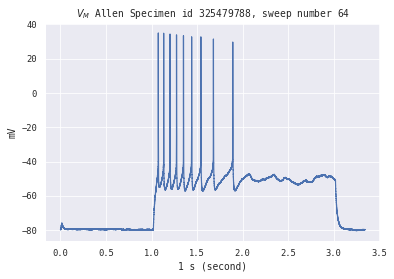

In [3]:
with open('325479788later_allen_NU_tests.p', "rb") as f:
    suite = pickle.load(f)
    
plt.plot(suite.traces["vm_soma"].times,suite.traces["vm_soma"])
plt.xlabel(pq.s)
plt.ylabel(suite.traces["vm_soma"].dimensionality)
plt.title("$V_{M}$ Allen Specimen id 325479788, sweep number 64")
plt.show()


# Example 2
* AdExp model 
* Allen specimen 325479788
You will notice that all the features are timinig related, and some would seem redudandant. This is because one must use brute force to get a good fit, for this particular problem.

Next can use sensativity analysis on the genes to find out which genes needed varying.

In [4]:
efel_filter_iterable = {
    "ISI_log_slope":None,
    "mean_frequency":None,
    "adaptation_index2":None,
    "first_isi":None,
    "ISI_CV":None,
    "median_isi":None,
    "Spikecount":None,
    "all_ISI_values":None,
    "ISI_values":None,
    "time_to_first_spike":None,
    "time_to_last_spike":None,
    "time_to_second_spike":None,
    "peak_voltage":None
}
( obs_preds,
    opt,
    target,
    hall_of_fame,
    cell_evaluator )  = test_opt_relative_diff(specimen_id = 325479788,
                                                                          model_type="ADEXP",
                                                                          efel_filter_iterable=efel_filter_iterable)


gen	nevals	avg   	std    	min    	max  
1  	150   	5265.7	7094.29	51.0591	20000


2  	141   	5640.8	7280.5 	51.0591	20212.7
3  	58    	1066.11	2668.69	51.0591	20000  
4  	58    	308.001	358.739	48.1455	2377.33
5  	60    	662.099	1875.58	43.1969	14981.3
6  	56    	475.226	1396.46	29.9656	10972.2
7  	56    	309.444	493.602	29.9656	3925.71
8  	57    	668.163	2528.85	28.4129	20000  
9  	50    	170.727	264.867	27.0365	1536.24
10 	56    	241.481	252.632	27.0365	1333.73
11 	51    	450.939	1619.72	23.2104	17924.4
12 	56    	221.159	277.432	23.2104	1355.6 
13 	54    	255.761	265.957	23.2104	1308.25
14 	54    	204.473	225.565	7.26902	1378.65
15 	59    	186.259	181.747	7.26902	936.618
16 	60    	297.945	1369.49	7.26902	15127.2
17 	52    	72.9196	71.849 	5.2702 	311.343
18 	53    	116.302	159.275	5.2702 	1045.98
19 	56    	116.881	157.096	5.2702 	1048.87
20 	59    	422.881	2542.16	5.2702 	20000  
21 	51    	45.3798	52.6828	5.2702 	298.884
22 	55    	52.9915	44.555 	5.2702 	247.817
23 	54    	52.7808	49.2158	3.31557	242.522
24 	50    	52.8597	51.9926	3.15525	279.413
25 	45    	4


[611.4510046073277, -22.99234201955364, -47.08195978995961, -66.53770780675657, 29.984345993609146, 5.718633025601218, 0.911294680068971, 8.662640604691667, 147.59827831988534, -26.55150165631111, 38.14799354638813] the gene


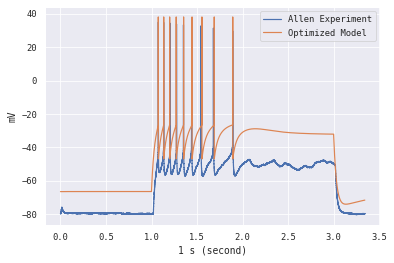

In [5]:

check_bin_vm_soma(target,opt)

In [6]:
params = opt.attrs_to_params()
params = pd.DataFrame([params])
params

,cm,v_spike,v_reset,v_rest,tau_m,a,b,delta_T,tau_w,v_thresh,spike_delta
0,611.45,-22.99,-47.08,-66.54,29.98,5.72,0.91,8.66,147.6,-26.55,38.15


In [7]:
df = pd.DataFrame(obs_preds)
df.rename(columns={0:'EFEL_feature_NU_test_Name',1:'prediction',2:'observation',3:'neuronunit_score'},inplace=True)
df

,EFEL_feature_NU_test_Name,prediction,observation,neuronunit_score
0,ISI_log_slope,0.485704,0.506583,Relative Difference = 0.02
1,mean_frequency,10.086294,10.087424,Relative Difference = 0.00
2,adaptation_index2,0.091943,0.094132,Relative Difference = 0.00
3,ISI_CV,0.476055,0.444111,Relative Difference = 0.03
4,Spikecount,9.000000,9.000000,Relative Difference = 0.00
5,all_ISI_values,102.212500,102.212500,Relative Difference = 0.00
6,ISI_values,108.400000,108.314286,Relative Difference = 0.09
7,time_to_first_spike,74.600000,74.500000,Relative Difference = 0.10
8,time_to_last_spike,892.300000,892.200000,Relative Difference = 0.10
9,time_to_second_spike,133.500000,134.000000,Relative Difference = 0.50


# Example 2
* Now fit Adaptive Exponential model to a single sweep from Allen specimen 325479788 sweep number 64

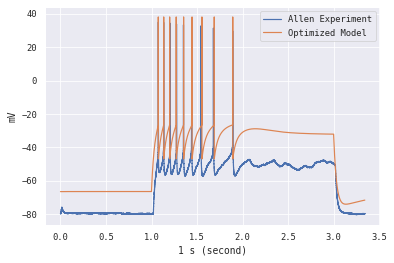

In [8]:
check_bin_vm_soma(target,opt)

In [9]:
params = opt.attrs_to_params()
params = pd.DataFrame([params])
params

,cm,v_spike,v_reset,v_rest,tau_m,a,b,delta_T,tau_w,v_thresh,spike_delta
0,611.45,-22.99,-47.08,-66.54,29.98,5.72,0.91,8.66,147.6,-26.55,38.15
